# IDS PROJECT

# PROJECT TITLE: Black Friday Sales - A study of  sales through consumer behaviour.

Team Members : Alok Kumtakar, Rohit Parmar, Keith Fernandes, Hardik Poojary

# Summary 


Deals and sales are some of the greatest motivators for consumers during the holiday season. Business owners need to make sure their site prominently features their best deals and that these are also advertised heavily in search and social media campaigns.

Thanksgiving Weekend is a great indicator for what will be a holiday season full of spending, as we are seeing a very positive consumer sentiment and willingness to spend during this time. 

In particular, during Black Friday, marketing idea that works best for high traffic stores are either having an hourly deal, keeping the Black Friday deals a surprise for customers to keep them coming back, offering a free gift is a fun Black Friday deal for shoppers, extending your sale, adding new products etc. 

Our project is to identify the customer purchase behavior against different products. We plan to predict the dependent  variable (the amount of purchase) with the help of the information contained in the other variables. Approaches could be for example - "Predicting the age of the consumer" or even "Predict the category of goods bought", purchases done based on marital status and gender etc. 

## Agenda

#### STEP 1 : Importing Libraries

#### STEP 2: Replacing Missing Values

#### STEP 3: Data Mapping

#### STEP 4: Graphical Analysis

#### STEP 5: Visualizations

#### STEP 6: Correlation Matrix

#### STEP 7: Conclusion

#  STEP 1: Importing Libraries

In [3]:
import numpy as np # linear Calculations
import pandas as pd # data processing, CSV file I/O 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats

import os

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [4]:
data = pd.read_csv('C:/Users/Bittu/Desktop/IDS/black-friday/BlackFriday.csv')


In [5]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


# STEP 2 : Replacing Missing Values

In [27]:
missing_values = data.isnull().sum().sort_values(ascending = False)
missing_values = missing_values[missing_values > 0]/data.shape[0]
print(f'{missing_values *100} %')

Product_Category_3    69.441029
Product_Category_2    31.062713
dtype: float64 %


The Nan values in the Product_Category 2 and 3 means the the person did not buy the products from these categories.

It would be safe to replace them with 0

In [28]:
data = data.fillna(0)

In [29]:
missing_values = data.isnull().sum().sort_values(ascending = False)
missing_values = missing_values[missing_values > 0]/data.shape[0]
print(f'{missing_values *100} %')

Series([], dtype: float64) %


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


# STEP 3 : Data Mapping

In [31]:
#unique values in Gender attribute
gender = np.unique(data['Gender'])
gender

array(['F', 'M'], dtype=object)

Mapping different categories by using the map() function.                                                             
map() function returns a list of the results after applying the given function to each item of a given iterable (list, tuple etc.)

Here we have categorized different variables such as Gender, Age, City Categories and Stay 

In [32]:
def gender_mapping(gender):
    if gender == 'M':
        return 1
    else:
        return 0
data['Gender'] = data['Gender'].apply(gender_mapping)

In [33]:
age = np.unique(data['Age'])
age

array(['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'],
      dtype=object)

We have bins. Lets make these bins into numeric values

In [34]:
def age_mapping(age):
    if age == '0-17':
        return 0
    elif age == '18-25':
        return 1
    elif age == '26-35':
        return 2
    elif age == '36-45':
        return 3
    elif age == '46-50':
        return 4
    elif age == '51-55':
        return 5
    else:
        return 6
data['Age'] = data['Age'].apply(age_mapping)

Lets talk about City_category

In [35]:
city_category = np.unique(data['City_Category'])
city_category

array(['A', 'B', 'C'], dtype=object)

In [36]:
def city_categories_mapping(city_category):
    if city_category == 'A':
        return 2
    elif city_category == 'B':
        return 1
    else:
        return 0
data['City_Category'] = data['City_Category'].apply(city_categories_mapping)

Finally we map the attribute Stay_In_Current_City_Years

In [37]:
city_stay = np.unique(data['Stay_In_Current_City_Years'])
city_stay

array(['0', '1', '2', '3', '4+'], dtype=object)

In [38]:
def stay_mapping(stay):
        if stay == '4+':
            return 4
        else:
            return int(stay)
data['Stay_In_Current_City_Years'] = data['Stay_In_Current_City_Years'].apply(stay_mapping)  

In [39]:
cols = ['User_ID','Product_ID']
data.drop(cols, inplace = True, axis =1)

In [40]:
data.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0,10,2,2,0,3,0.0,0.0,8370
1,0,0,10,2,2,0,1,6.0,14.0,15200
2,0,0,10,2,2,0,12,0.0,0.0,1422
3,0,0,10,2,2,0,12,14.0,0.0,1057
4,1,6,16,0,4,0,8,0.0,0.0,7969


# STEP 4 : GRAPHICAL ANALYSIS OF EACH VARIABLE WITH PURCHASE

Now plotting a graph based on the amount of Purchase done and grouping it by Gender.

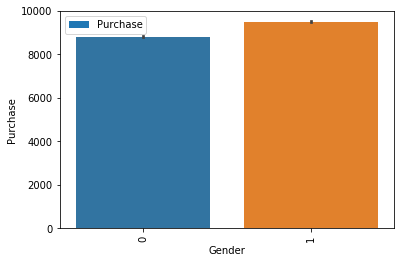

In [41]:
data[['Gender','Purchase']].groupby('Gender').mean().plot.bar()
sns.barplot('Gender', 'Purchase', data = data)
plt.show()

As we can see, men tend to spend more on Black Friday eventhough women are not behind.

Plotting a graph based on the amount of Purchase done and grouping it by Age. This is important because we can confirm on the hypothesis that people with more age tend to shop more considering their income is more.

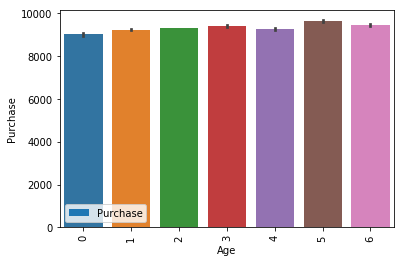

In [42]:
data[['Age','Purchase']].groupby('Age').mean().plot.bar()
sns.barplot('Age', 'Purchase', data = data)
plt.show()


Plotting box plots for Purchase v/s Age through which we get to know the mean and quartile range for diiferent age groups.

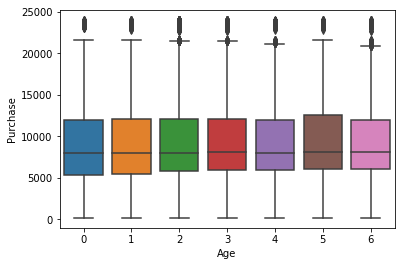

In [43]:
sns.boxplot('Age','Purchase', data = data)
plt.show()

Irrespective of the age group you belong to, you are gonna make full use of your purchasing power on a Black Friday. Ofcourse, because everything is cheap 

Plotting a graph based on the amount of Purchase done and grouping it by City category.

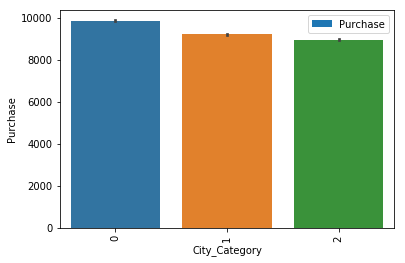

In [44]:
data[['City_Category','Purchase']].groupby('City_Category').mean().plot.bar()
sns.barplot('City_Category', 'Purchase', data = data)
plt.show()

The people belonging to category 0 tend to spend a little more. These may be the more developed cities we take into consideration here.

# STEP 5: VISUALIZATION

In [8]:
# Get to know data - Product_ID, Product_Category*
# 3,623 distinct products, grouped into 18 main categories (i.e. Product_Category_1)
# Drop product category 2 & 3 - lots of missing values 
# Drop Product_ID - may not be very informative to look at individual product
data['Product_ID'].value_counts().count()
data['Product_Category_1'].value_counts(dropna = False).sort_index()
data['Product_Category_2'].value_counts(dropna = False).sort_index()
data['Product_Category_3'].value_counts(dropna = False).sort_index()

data = data.drop(['Product_ID', 'Product_Category_2', 'Product_Category_3'], axis = 1)

3623

1     138353
2      23499
3      19849
4      11567
5     148592
6      20164
7       3668
8     112132
9        404
10      5032
11     23960
12      3875
13      5440
14      1500
15      6203
16      9697
17       567
18      3075
Name: Product_Category_1, dtype: int64

 2.0      48481
 3.0       2835
 4.0      25225
 5.0      25874
 6.0      16251
 7.0        615
 8.0      63058
 9.0       5591
 10.0      2991
 11.0     13945
 12.0      5419
 13.0     10369
 14.0     54158
 15.0     37317
 16.0     42602
 17.0     13130
 18.0      2730
NaN      166986
Name: Product_Category_2, dtype: int64

 3.0        600
 4.0       1840
 5.0      16380
 6.0       4818
 8.0      12384
 9.0      11414
 10.0      1698
 11.0      1773
 12.0      9094
 13.0      5385
 14.0     18121
 15.0     27611
 16.0     32148
 17.0     16449
 18.0      4563
NaN      373299
Name: Product_Category_3, dtype: int64

In [9]:
 #Generate new features - total # products purchased by customer; and total amount 
tot_item = data['User_ID'].value_counts().sort_index()
tot_purchase = data.groupby('User_ID').sum()['Purchase']
tot = pd.concat([tot_item, tot_purchase], axis = 1, keys = ['Tot_Products', 'Tot_Purchase'])

data = pd.merge(data, tot, left_on = 'User_ID', right_index = True)

Text(0.5,0.95,'Demand & Revenue by Product Category')

Text(0,0.5,'Quantity')

Text(0.5,0,'Product Category')

Text(0,0.5,'Revenue (/Million $)')

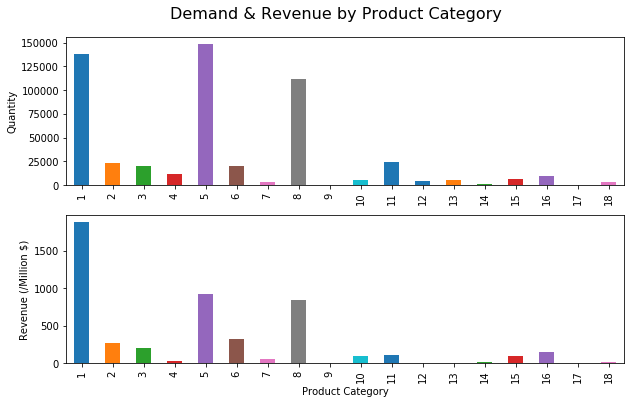

In [10]:
# Data Exploration
#1) Demand & revenue by product category:
# 3 best sellers are product category 5, 1, 8. While product category 1 generated a lot more revenue than 5 & 8,
# about twice as much - could potentially allocate more resource to product category 5, 1 & 8, especially category
# 1, e.g. more stock, for next Black Friday
fig1, axes = plt.subplots(2, 1, figsize = (10, 6))

fig1.suptitle('Demand & Revenue by Product Category', fontsize = 16, y = 0.95)

demand_product_cat = data['Product_Category_1'].value_counts().sort_index()
demand_product_cat.plot(kind = 'bar', ax = axes[0])
plt.sca(fig1.axes[0])
plt.ylabel('Quantity')

revenue_product_cat = data.groupby('Product_Category_1').sum()['Purchase']/1000000 # $(in million)
revenue_product_cat.plot(kind = 'bar', ax = axes[1])
plt.sca(fig1.axes[1])
plt.xlabel('Product Category')
plt.ylabel('Revenue (/Million $)')

plt.savefig('fig1.png')

Text(0.5,0.92,'Product Demand by Customer Groups')

Text(0.5,0,'Product Category')

Text(0.5,0,'Product Category')

Text(0.5,0,'Product Category')

Text(0.5,0,'Product Category')

Text(0.5,0,'Product Category')

Text(0.5,0,'Product Category')

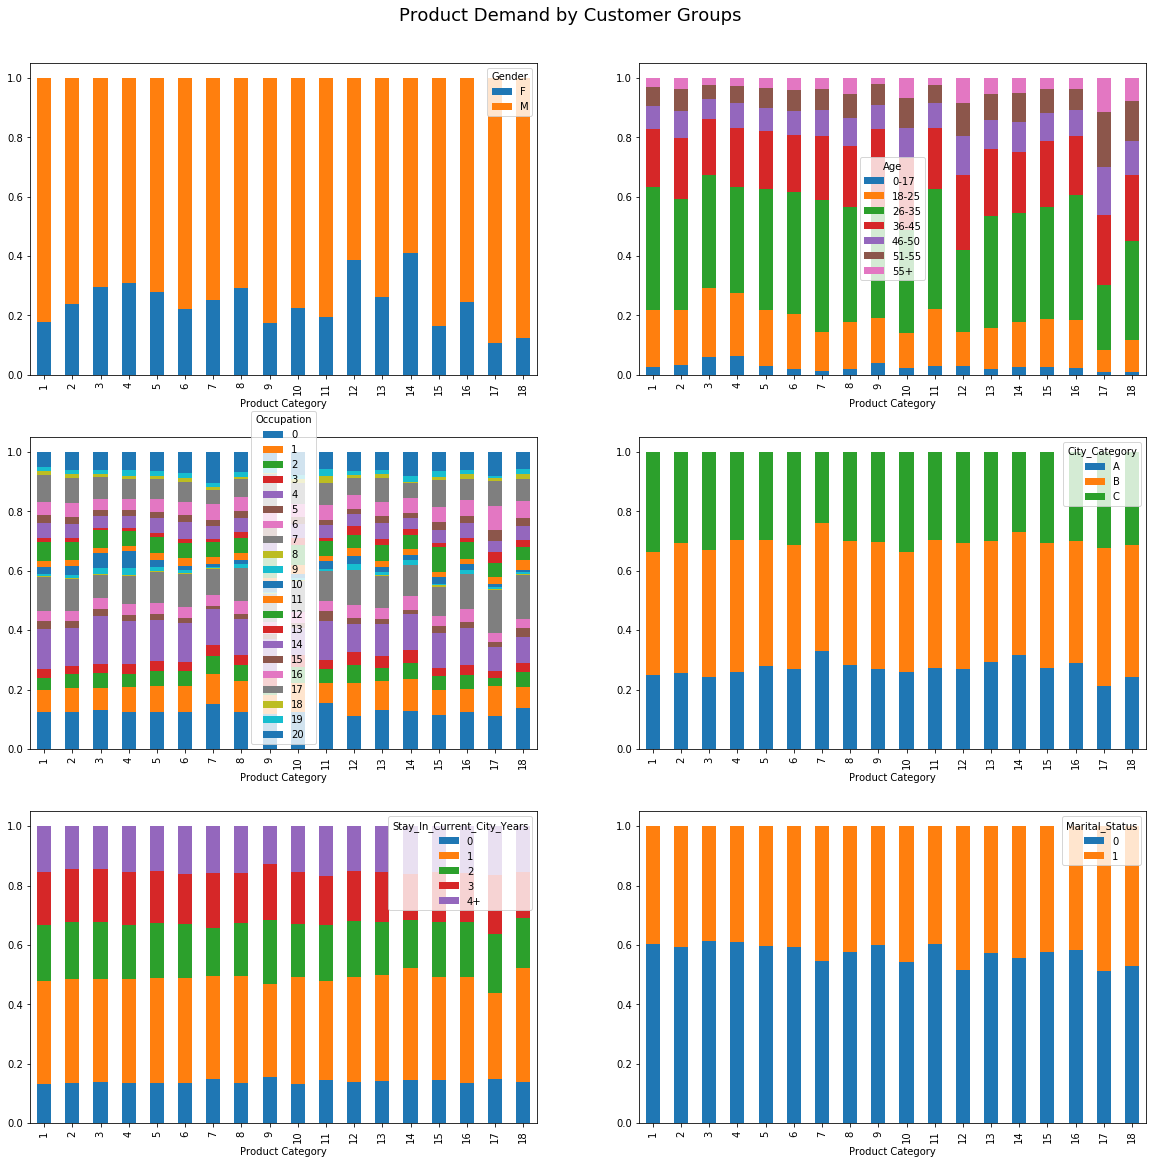

In [26]:
#2) Who purchased the most to each product category? Or which products were more attractive to which customers?
chars = ['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status']

fig2, axes = plt.subplots(3, 2, figsize = (20, 19.5))

fig2.suptitle('Product Demand by Customer Groups', fontsize = 18, y = 0.92)

n = 0

for i in range(3):
    for j in range(2):
        p = pd.crosstab(data['Product_Category_1'], data[chars[n]])
        p = p.apply(lambda r: r/r.sum(), axis = 1)
        p.plot(kind = 'bar', ax = axes[i][j], stacked = True)
        
        n += 1
        
for ax in fig2.axes:
    plt.sca(ax)
    plt.xlabel('Product Category')
    

plt.savefig('fig2.png')

In [42]:
#4) Customer's purchase behavior - who purchased more?
# Construct customer level data
data_customer = data.copy()


In [43]:
data_customer.drop_duplicates(inplace = True)
data_customer['Tot_Purchase'] = data_customer['Tot_Purchase']/1000    # per thousand $
data_customer.count()['User_ID']   #5,891 customers
data_customer.head()


5891

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Tot_Products,Tot_Purchase
0,1000001,F,0-17,10,A,2,0,34,333.481
4,1000002,M,55+,16,C,4+,0,76,810.353
5,1000003,M,26-35,15,A,3,0,29,341.635
6,1000004,M,46-50,7,B,2,1,13,205.987
9,1000005,M,26-35,20,A,1,1,106,821.001


C:\DataScience\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Distribution of Total Amount of Purchase by Customer')

Text(0.5,0,'Total Amount of Purchase(/Thousand $)')

Text(0,0.5,'# Customers')

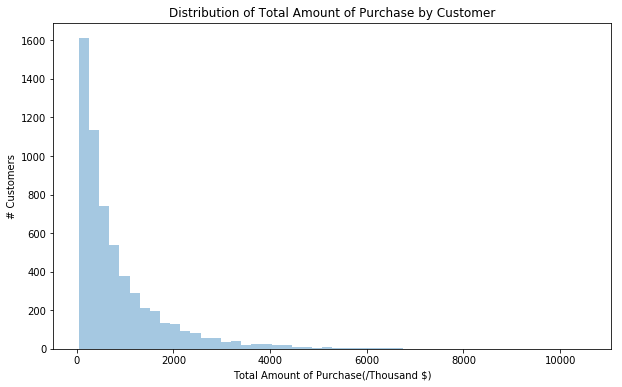

In [37]:
# Look at the distribution of total amount of purchase by customer - right skewed
fig4 = plt.figure(figsize = (10, 6))
sns.distplot(data_customer['Tot_Purchase'],kde = False)

plt.title('Distribution of Total Amount of Purchase by Customer')
plt.xlabel('Total Amount of Purchase(/Thousand $)')
plt.ylabel('# Customers')

plt.savefig('fig4.png')

#### So as we see, the graph is right skewed, which implies that as the puchase amount increases for products, the number of customers purchasing those products decreases 

Text(0.5,0.93,'Median Amount of Purchase by Customer Groups')

Text(0,0.5,'Median Total Amount of Purchase (/Thousand $)')

Text(0,0.5,'Median Total Amount of Purchase (/Thousand $)')

Text(0,0.5,'Median Total Amount of Purchase (/Thousand $)')

Text(0,0.5,'Median Total Amount of Purchase (/Thousand $)')

Text(0,0.5,'Median Total Amount of Purchase (/Thousand $)')

Text(0,0.5,'Median Total Amount of Purchase (/Thousand $)')

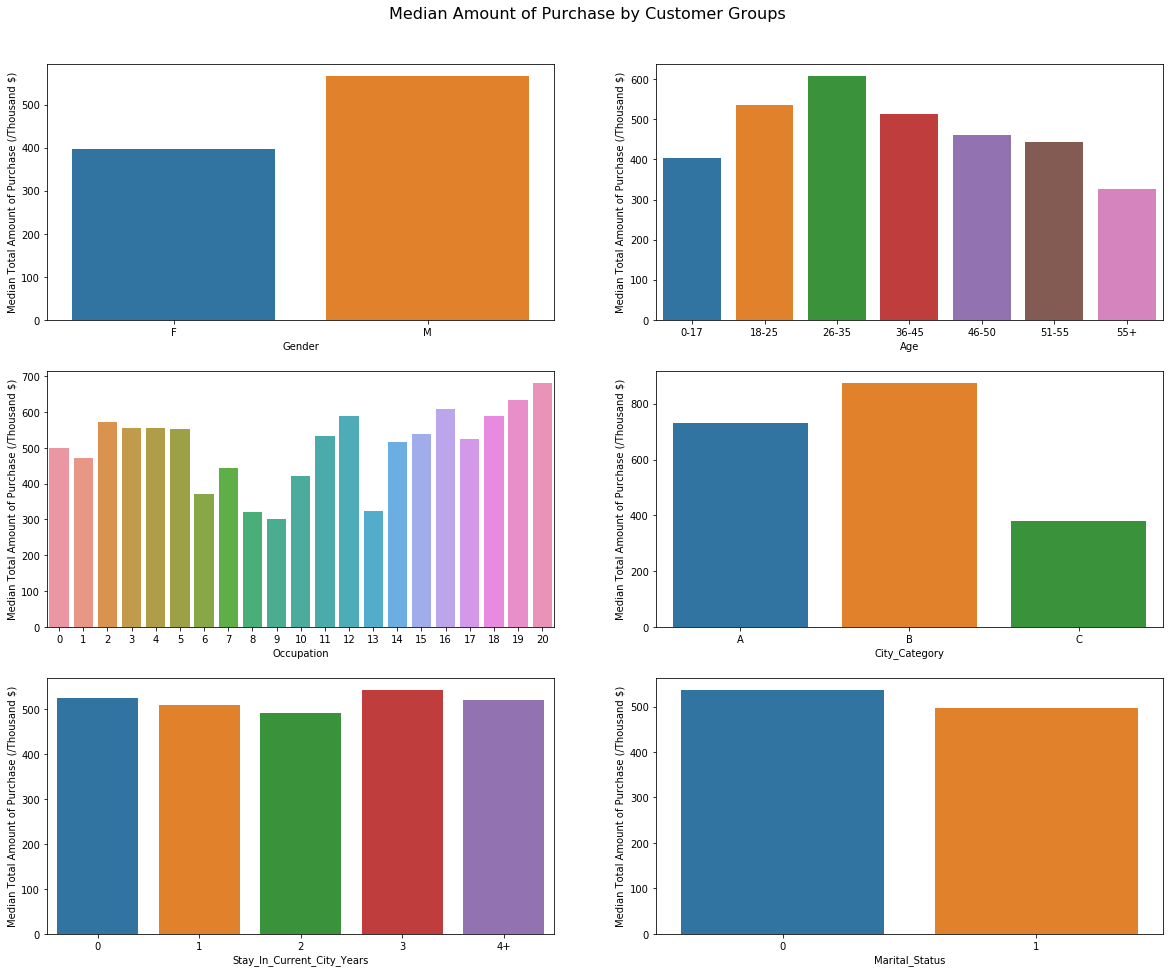

In [40]:
# Bar charts - show median instead of mean of total amount of purchase by each characteristic
fig5, axes = plt.subplots(3,2,figsize=(20,16))

fig5.suptitle('Median Amount of Purchase by Customer Groups', fontsize = 16, y = 0.93)

sns.barplot(x='Gender', y='Tot_Purchase', data = data_customer, estimator = np.median, ci = None, ax = axes[0][0])
sns.barplot(x='Age', y='Tot_Purchase', data = data_customer, estimator = np.median, ci = None, 
            ax = axes[0][1], order = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'])
sns.barplot(x='Occupation', y='Tot_Purchase', data = data_customer, estimator = np.median, ci = None, ax = axes[1][0])
sns.barplot(x='City_Category', y='Tot_Purchase', data = data_customer, estimator = np.median, 
            ci = None, ax = axes[1][1], order = ('A', 'B', 'C'))
sns.barplot(x='Stay_In_Current_City_Years', y='Tot_Purchase', data = data_customer, estimator = np.median, 
            ci = None, ax = axes[2][0], order = ('0', '1', '2', '3', '4+'))
sns.barplot(x='Marital_Status', y='Tot_Purchase', data = data_customer, estimator = np.median, ci = None, ax = axes[2][1])

for ax in fig5.axes:
    plt.sca(ax)
    plt.ylabel('Median Total Amount of Purchase (/Thousand $)')
 
plt.savefig('fig5')

#### We take the median of each independent variable and map it to the dependent varaible which is the purchase amount since our dataset is not normally distruibuted.

# STEP 5: CORRELATION MATRIX

###### What is a Correlation Matrix??

A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used as a way to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses.

Here it gives the correlation between all the variables used and shows if they have high correlation or low correlation.

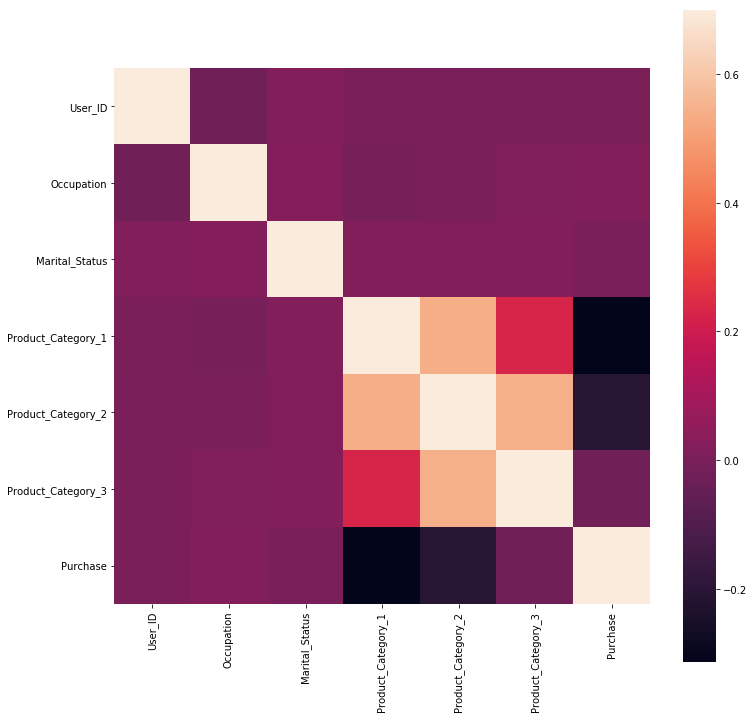

In [4]:
corrmatrix = data.corr()
fig,ax = plt.subplots(figsize = (12,12))
sns.heatmap(corrmatrix, vmax=.7, square=True)

We can see that nothing is highly correlated with the Purchase variable. Although a few conclusions can be drawn:

Maritial_Status and purchase has a good correlation.

Product_Category_1 has a negative correlation with Purchase.

Product_Category_3 has a strong correlation with Purchase. Maybe the products in this category were cheap. But this is our assumption. We will have to perform another analysis to confirm if this is true.

In [8]:
Median_cat_1 = data['Product_Category_1'].median()
Median_cat_2 = data['Product_Category_2'].median()
Median_cat_3= data['Product_Category_3'].median()
print(f"PC1: {Median_cat_1} \n PC2: {Median_cat_2} \n PC3 : {Median_cat_3}")

PC1: 5.0 
 PC2: 9.0 
 PC3 : 14.0


Hence we see that our intial hypothesis was correct. It can be seen that product category 3 is much more in price as compared 1 or 2. 

Hence Product_Category_3 has strong correlation with Purchase

# STEP 7: CONCLUSION

#### 1) When it comes to the independent variable Gender : Male purchases more than female.

#### 2) Age bracket 26-35 people are purchasing the most, but also the other two categories 18-25 and 36-45 also ranked a close second.

#### 3) Singles purchase more than Married peeople.

#### 4) City Cateogory 0 ranks first followed by 1 and 2.

#### 5) Customers in the bracket of Occupation 4 have the most number of purchases with respect to the amount.

#### 6) Lastly when it comes to the Demand and Revenue : Quantitiy wise product number 5 is the one which was purchased the most, but when it comes to the revenue generated, product category 1 generates the most revenue.
